# Abalone Case Study


Data Description

Importing required libraries.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

Loading the data set.

In [3]:
df=pd.read_csv('abalone.data.csv')

In [4]:
df.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [5]:
df.rename(columns={'M':'Sex','0.455':'Length','0.365':'Diameter','0.095':'Height','0.514':'Whole weight','0.2245':'Shucked weight','0.101':'Viscera weight','0.15':'Shell weight','15':'Rings'},inplace=True)

In [6]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [7]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [8]:
df.shape  #checking the data dimensions

(4176, 9)

In [9]:
df.info() #checking the data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Checking Null Values

In [10]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

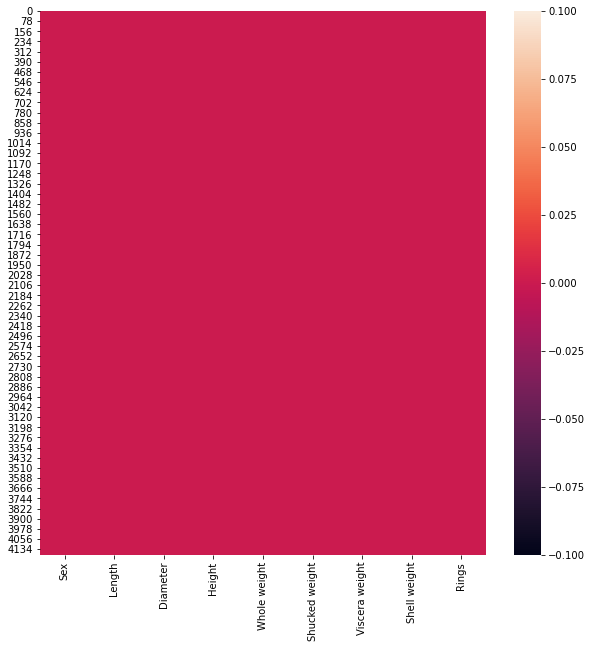

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.show()

Statistical Summary

In [12]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [13]:
df['Rings'].unique()

array([ 7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 15, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [14]:
df['Rings'].value_counts(ascending=False)

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    102
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
df['Sex']=le.fit_transform(df['Sex'])

In [17]:
df['Sex']

0       2
1       0
2       2
3       1
4       1
       ..
4171    0
4172    2
4173    2
4174    0
4175    2
Name: Sex, Length: 4176, dtype: int32

In [18]:
df['Sex'].unique()

array([2, 0, 1])

In [19]:
df['Sex'].value_counts()

2    1527
1    1342
0    1307
Name: Sex, dtype: int64

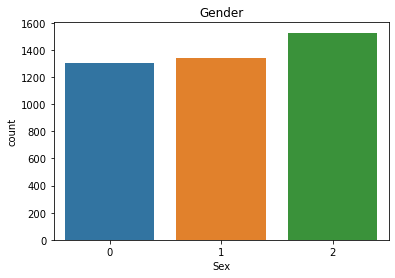

In [20]:
plt.title('Gender')
sns.countplot(df['Sex'])
plt.show()

Checking Correlation

In [21]:
corr=df.corr()
corr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.035915,-0.038762,-0.041796,-0.021219,-0.001205,-0.031873,-0.034686,-0.035076
Length,-0.035915,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,-0.038762,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,-0.041796,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole weight,-0.021219,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked weight,-0.001205,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera weight,-0.031873,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell weight,-0.034686,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,-0.035076,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


In [22]:
corr['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.628031
Diameter          0.575005
Height            0.558109
Length            0.557123
Whole weight      0.540818
Viscera weight    0.504274
Shucked weight    0.421256
Sex              -0.035076
Name: Rings, dtype: float64

In [23]:
#checking correlation with heatmap.

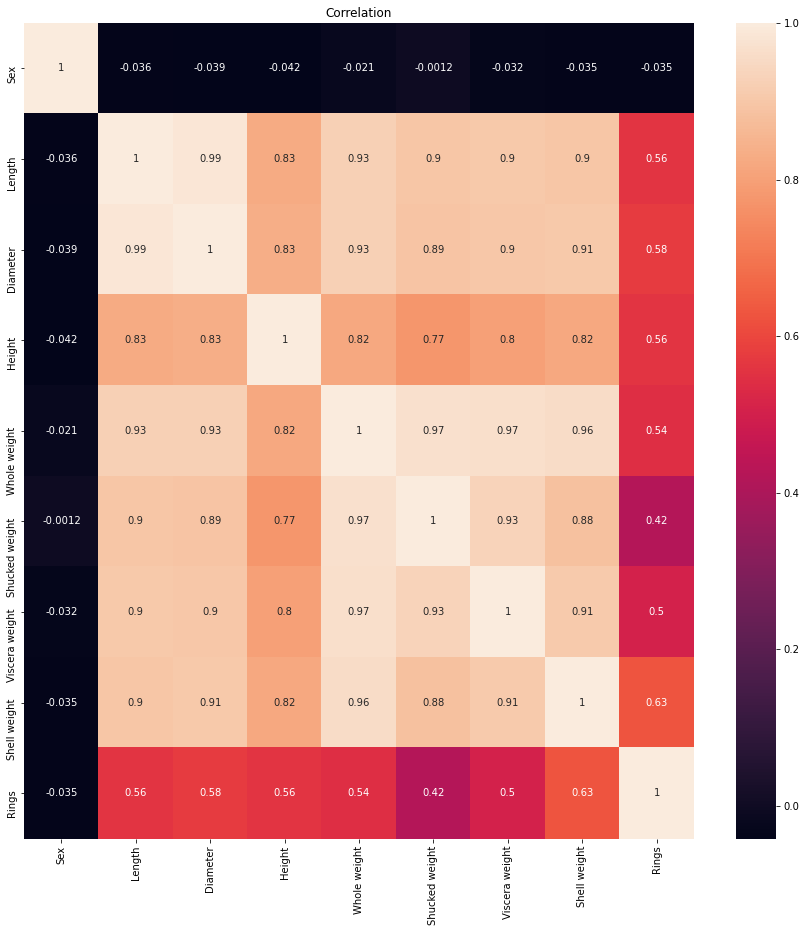

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.title('Correlation')
plt.show()

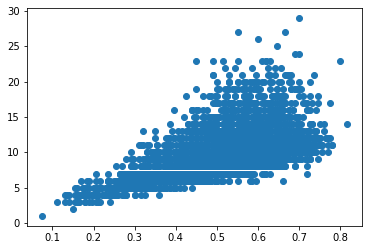

In [25]:
plt.scatter(df['Length'],df['Rings'])
plt.show()

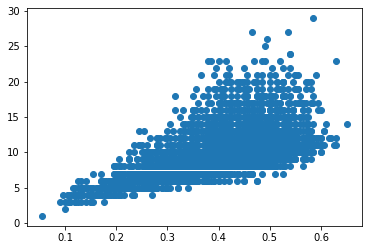

In [26]:
plt.scatter(df['Diameter'],df['Rings'])
plt.show()

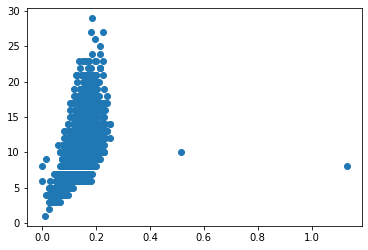

In [27]:
plt.scatter(df['Height'],df['Rings'])
plt.show()

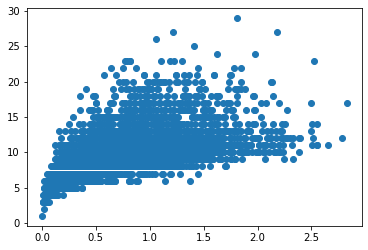

In [28]:
plt.scatter(df['Whole weight'],df['Rings'])
plt.show()

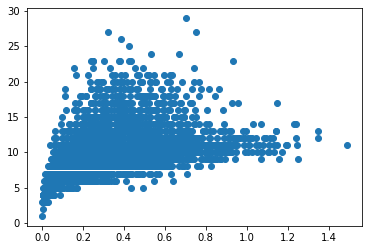

In [29]:
plt.scatter(df['Shucked weight'],df['Rings'])
plt.show()

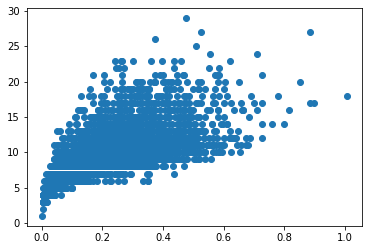

In [30]:
plt.scatter(df['Shell weight'],df['Rings'])
plt.show()

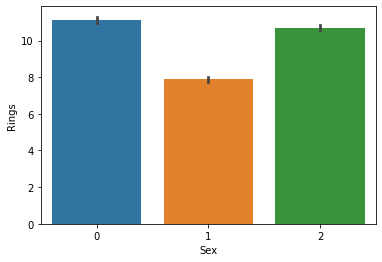

In [31]:
sns.barplot(x='Sex',y='Rings',data=df)
plt.show()

In [32]:
x=df.drop('Rings',axis=1)
y=df['Rings']

In [33]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120


In [34]:
print(x.shape)
print(y.shape)

(4176, 8)
(4176,)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [38]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))   
print(classification_report(y_test,predlr))

0.2649640861931365
[[ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5 14  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4 23  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20 40 18  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10 48 52  6  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 25 70 45 16  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 15 57 88 45  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 11 19 66 63 29  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  9 16 35 50 39  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5 13 20 21 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  8 15 18 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  9 21 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  8  6 11  5  0  0  0  0  

C:\Users\Naniii\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Naniii\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
preds=svc.predict(x_test)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

0.26177174780526735
[[  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   6   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0  17   4   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0  26   9   0   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0  29  33   7   9   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0  16  47  27  22   6   1   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   6  25  54  64  12   1   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   2  15  39 110  42   6   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   7  16  90  57  19   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   5  13  57  43  31   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0 

C:\Users\Naniii\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
predd=dt.predict(x_test)
print(accuracy_score(y_test,predd))
print(confusion_matrix(y_test,predd))
print(classification_report(y_test,predd))

0.1971268954509178
[[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  4  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  2  7  5  4  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  8 12 10  5  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  1  2  9 21 23 15  3  4  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  1  0  2 29 29 26 14  8  6  2  1  1  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  2  6 25 42 45 16 18  2  2  1  1  0  1  0  0  0  0  0  0  0  1
   0]
 [ 0  0  0  1  4 11 43 45 51 21 13  7  5  5  0  1  4  3  0  0  0  0  0  0
   0]
 [ 0  0  0  0  3  5 22 42 37 34 15 11  3  4  5  2  2  2  2  0  0  0  0  0
   0]
 [ 0  0  0  0  2  4 11 31 25 31 18  6  4  8  2  1  1  2  1  1  0  1  0  0
   0]
 [ 0  0  0  0  0  3  8 11 18  7  9  6  1  2  2  2  3  1  0  0  0  1  0  0
   0]
 [ 0  0  0  0  1  1  3  6 13  3  5  8  4  2  3  3  2  2  1  0  0  0  0  0
   0]
 [ 0  0  0  0  0  1  

C:\Users\Naniii\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naniii\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print(accuracy_score(y_test,predr))
print(confusion_matrix(y_test,predr))
print(classification_report(y_test,predr))

0.25379090183559455
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 10  5  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9 10 10  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  7 24 27 17  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  4 19 40 34 14  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 11 28 51 47 14  7  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 17 37 68 61 17  5  3  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  4 15 46 65 39  7  5  0  2  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3  9 39 42 33  5 10  3  1  2  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  1  2  5 19 15 17  8  2  2  0  2  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  6  5 16 10 10  4  0  1  2  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  9 14 14  5  2  1  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  6  6  2  2  4  2  3 

C:\Users\Naniii\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


cross_val_score

In [43]:
from sklearn.model_selection import cross_val_score
Lrs=cross_val_score(LR,x,y,cv=5)
print('cross validation of LogisticRegression:',Lrs.mean())

C:\Users\Naniii\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Naniii\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Naniii\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the d

cross validation of LogisticRegression: 0.2552774833108902


C:\Users\Naniii\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
svr=cross_val_score(svc,x,y,cv=5)
print('cross validation of SVM:',svr.mean())

C:\Users\Naniii\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


cross validation of SVM: 0.254556055353408


In [45]:
dtr=cross_val_score(dt,x,y,cv=5)
print('cross validation score of DecisionTreeClassifier:',dtr.mean())

C:\Users\Naniii\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


cross validation score of DecisionTreeClassifier: 0.20115692060854368


In [46]:
rfr=cross_val_score(dt,x,y,cv=5)
print('cross valdation of RandomForestClassifier:',rfr.mean())

C:\Users\Naniii\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


cross valdation of RandomForestClassifier: 0.2006764461507607


HYPER PARAMETER TUNING

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
grid_param={'criterion':['gini','entropy']}
gd=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd.fit(x,y)
best_parameter=gd.best_params_
print('best_parameter:',best_parameter)

C:\Users\Naniii\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


best_parameter: {'criterion': 'entropy'}


In [50]:
gd_pred=gd.best_estimator_.predict(x_test)

In [51]:
gd_pred

array([ 7,  9,  9, ..., 11,  8,  6], dtype=int64)

In [52]:
accuracy_score(y_test,gd_pred)

1.0

In [53]:
import joblib
joblib.dump(gd.best_estimator_,'abalon.pkl')

['abalon.pkl']